In [67]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [68]:
df = pd.read_csv('Reliance5_05-07-2002to29-11-2022.csv')

In [69]:
df.head()

,s,t,Open,High,Low,Close,Volume,Date
0,ok,1026086400,64.39,67.81,64.39,67.33,18579281,2002-07-08 05:30:00
1,ok,1026172800,67.38,69.00,66.90,68.58,14780037,2002-07-09 05:30:00
2,ok,1026259200,67.86,69.09,67.86,68.69,10965776,2002-07-10 05:30:00
3,ok,1026345600,68.35,68.50,65.56,65.80,10373050,2002-07-11 05:30:00
4,ok,1026432000,66.50,66.71,65.47,65.71,6289646,2002-07-12 05:30:00


In [70]:
#df = df.drop(['t','s'],axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s       5069 non-null   object 
 1   t       5069 non-null   int64  
 2   Open    5069 non-null   float64
 3   High    5069 non-null   float64
 4   Low     5069 non-null   float64
 5   Close   5069 non-null   float64
 6   Volume  5069 non-null   int64  
 7   Date    5069 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 316.9+ KB


In [72]:
df['Date'] = df['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

In [73]:
df.head()

,s,t,Open,High,Low,Close,Volume,Date
0,ok,1026086400,64.39,67.81,64.39,67.33,18579281,2002-07-08
1,ok,1026172800,67.38,69.00,66.90,68.58,14780037,2002-07-09
2,ok,1026259200,67.86,69.09,67.86,68.69,10965776,2002-07-10
3,ok,1026345600,68.35,68.50,65.56,65.80,10373050,2002-07-11
4,ok,1026432000,66.50,66.71,65.47,65.71,6289646,2002-07-12


In [74]:
df = df.set_index('Date')

In [75]:
#df = df.drop(['s','t'],axis=1)

In [76]:
df.shape

(5069, 7)

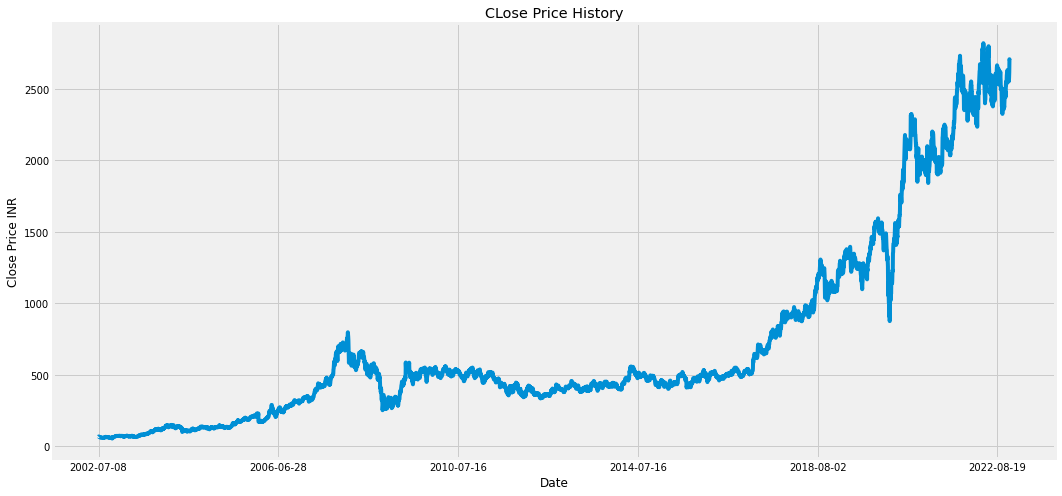

In [77]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data


plt.figure(figsize = (16,8))
plt.ylabel('Close Price INR')
plt.title("CLose Price History")
plt.xlabel('Date')
df['Close'].plot()
plt.show()

In [78]:
df.head()

,s,t,Open,High,Low,Close,Volume
Date,,,,,,,
2002-07-08,ok,1026086400,64.39,67.81,64.39,67.33,18579281
2002-07-09,ok,1026172800,67.38,69.00,66.90,68.58,14780037
2002-07-10,ok,1026259200,67.86,69.09,67.86,68.69,10965776
2002-07-11,ok,1026345600,68.35,68.50,65.56,65.80,10373050
2002-07-12,ok,1026432000,66.50,66.71,65.47,65.71,6289646


In [79]:
#New Dataframe for close data only
df_Close = df.filter(['Close'])
#Convert the datafrane to a numpy array
dataset = df_Close.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .90)

training_data_len


4563

In [80]:
dataset

array([[  67.33],
       [  68.58],
       [  68.69],
       ...,
       [2617.6 ],
       [2707.55],
       [2702.3 ]])

In [81]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_Data = scaler.fit_transform(dataset)


scaled_Data

array([[0.00466475],
       [0.00511676],
       [0.00515654],
       ...,
       [0.92686464],
       [0.95939134],
       [0.95749289]])

In [82]:
#Create the training Data set
#Create the scaled training data set
train_data = scaled_Data[0:training_data_len,:]
#Split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    if i<= 100:
        print(x_train)
        print(y_train)
        print()

[array([0.00466475, 0.00511676, 0.00515654, 0.00411149, 0.00407895,
       0.00412957, 0.00341359, 0.00305559, 0.00354377, 0.00358354,
       0.00331595, 0.00331234, 0.00284586, 0.00286756, 0.0022926 ,
       0.00250595, 0.00241916, 0.0022022 , 0.00226367, 0.0020684 ,
       0.00216604, 0.00194907, 0.00192376, 0.00119692, 0.00133434,
       0.00189483, 0.00203947, 0.00168148, 0.00206117, 0.00228175,
       0.00261081, 0.00227452, 0.00249872, 0.00268314, 0.00279162,
       0.00240108, 0.00232153, 0.00266867, 0.00320024, 0.00407533,
       0.00398854, 0.00443694, 0.0041368 , 0.00411149, 0.00368841,
       0.00337019, 0.00364863, 0.00351122, 0.00342805, 0.00374627,
       0.00348229, 0.00343167, 0.00320024, 0.00360162, 0.00320024,
       0.00318577, 0.00321832, 0.0034172 , 0.00342805, 0.00270483,
       0.0019997 , 0.00146813, 0.00182612, 0.00202139, 0.00166702,
       0.00153322, 0.0017755 , 0.00200693, 0.00218773, 0.00214072,
       0.00207202, 0.00200331, 0.00180804, 0.00145005, 0.0009

In [83]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [84]:
#reshape the data
#lstm requires  3d number samples, number of time steps, number of features
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4463, 100, 1)

In [85]:

#Build the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences = True,input_shape=(x_train.shape[1],1)))
#model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

In [86]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [87]:
#Train the model
model.fit(x_train,y_train,batch_size = 1, epochs=1)

4463/4463 [==============================] - 165s 36ms/step - loss: 5.8805e-04


In [88]:
#Create the testing data set
#Create a new array containing scaled values 
test_data = scaled_Data[training_data_len - 100: , :]
#Create the data sets ×_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (100, len (test_data)) :
  x_test.append(test_data[i-100:i, 0])

In [89]:
#x_test.shape

In [90]:
y_test.shape

(506, 1)

In [91]:
x_test = np.array(x_test)

In [92]:

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [93]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 23ms/step


In [94]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.2019667795053115

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


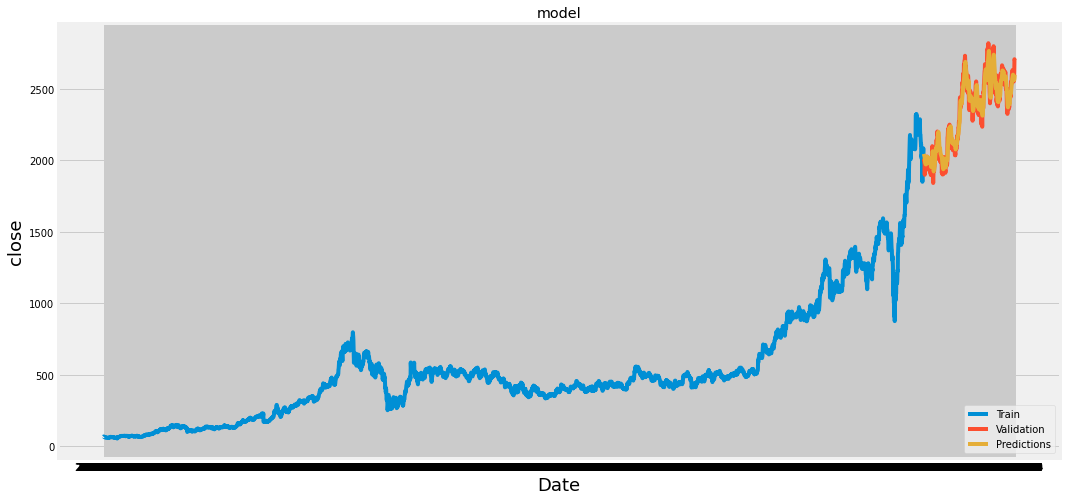

In [95]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close',fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Validation','Predictions'],loc = "lower right")
plt.show()

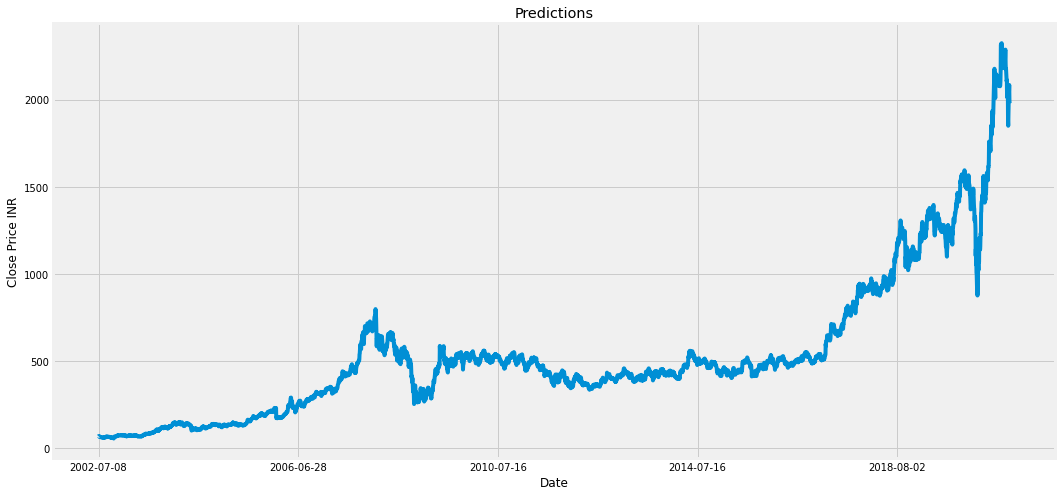

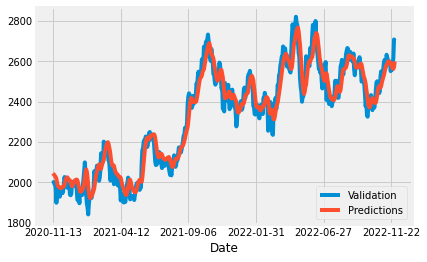

In [96]:
plt.figure(figsize = (16,8))
plt.ylabel('Close Price INR')
plt.title("Predictions")
plt.xlabel('Date')
#df['Close'].plot()
train['Close'].plot()
valid[['Close','predictions']].plot()
plt.legend(['Validation','Predictions'],loc = "lower right")
plt.show()

In [97]:
valid

,s,t,Open,High,Low,Close,Volume,predictions
Date,,,,,,,,
2020-11-13,ok,1605225600,1982.00,2036.65,1981.75,1996.40,20946864,2045.347534
2020-11-14,ok,1605312000,2014.90,2015.30,1995.35,2002.30,2411900,2041.079468
2020-11-17,ok,1605571200,2085.00,2085.00,1985.00,1993.25,21479385,2036.929565
2020-11-18,ok,1605657600,1993.25,2006.50,1960.10,1987.20,14030652,2031.655396
2020-11-19,ok,1605744000,1987.20,2010.45,1968.20,1973.15,12828008,2025.700317
...,...,...,...,...,...,...,...,...
2022-11-23,ok,1669161600,2575.00,2577.90,2552.25,2557.05,2959787,2572.259277
2022-11-24,ok,1669248000,2566.00,2594.00,2548.20,2579.10,4333225,2563.967285
2022-11-25,ok,1669334400,2589.00,2624.90,2582.10,2617.60,3391988,2562.068115


In [98]:
model.save("")

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________
